In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
org_df = pd.read_csv("teleCust1000t.csv")
org_df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
org_df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [4]:
org_df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [5]:
print("na", org_df.isna().sum().sum())
print("null", org_df.isnull().sum().sum())

na 0
null 0


In [6]:
org_df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

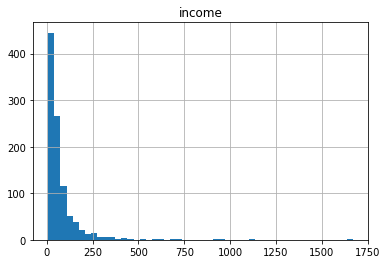

In [7]:
org_df.hist(column="income", bins=50)

In [8]:
org_df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [9]:
x_data = org_df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
y_data = org_df['custcat'].values

print(x_data[0:5])
print(y_data[0:5])

[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]
 [  3.  68.  52.   1.  24. 116.   1.  29.   0.   1.   2.]
 [  2.  33.  33.   0.  12.  33.   2.   0.   0.   1.   1.]
 [  2.  23.  30.   1.   9.  30.   1.   2.   0.   0.   4.]]
[1 4 3 1 3]


In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_data)
x_data = scaler.transform(x_data.astype(float))
print(x_data[0:5])

[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=4)

print("Train set:", X_train.shape, y_train.shape)
print(" set:", X_test.shape, y_train.shape)

Train set: (800, 11) (800,)
 set: (200, 11) (800,)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [35]:
y_ = neigh.predict(X_test)
print("y_test:", y_test[0:10])
print("y_    :", y_[0:10])

y_test: [4 1 1 2 4 4 3 1 3 4]
y_    : [1 1 3 2 4 3 3 2 2 4]


In [36]:
from sklearn import metrics

print("Train set accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test, y_))

Train set accuracy: 0.5475
Test set accuracy: 0.32


In [39]:
Ks = 10
mean_acc = np.zeros((Ks-1))

for k in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    y_ = neigh.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test, y_)
    
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

In [42]:
print("The best accuracy is: {0} for 'K = {1}'".format(mean_acc.max(), mean_acc.argmax()+1))

The best accuracy is: 0.34 for 'K = 9'
